In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
start=pd.read_csv("50_Startups.csv")
start

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
start1=start.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
start1

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
start1[start1.duplicated()]

,RDS,ADMS,MKTS,State,Profit


In [6]:
start1.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
start1.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


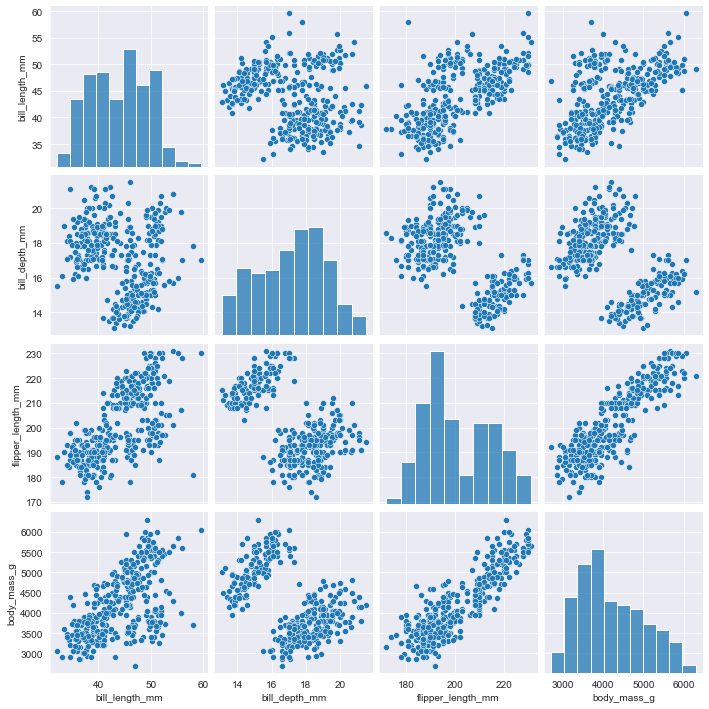

In [26]:
penguins=sns.load_dataset("penguins")
sns.pairplot(penguins)

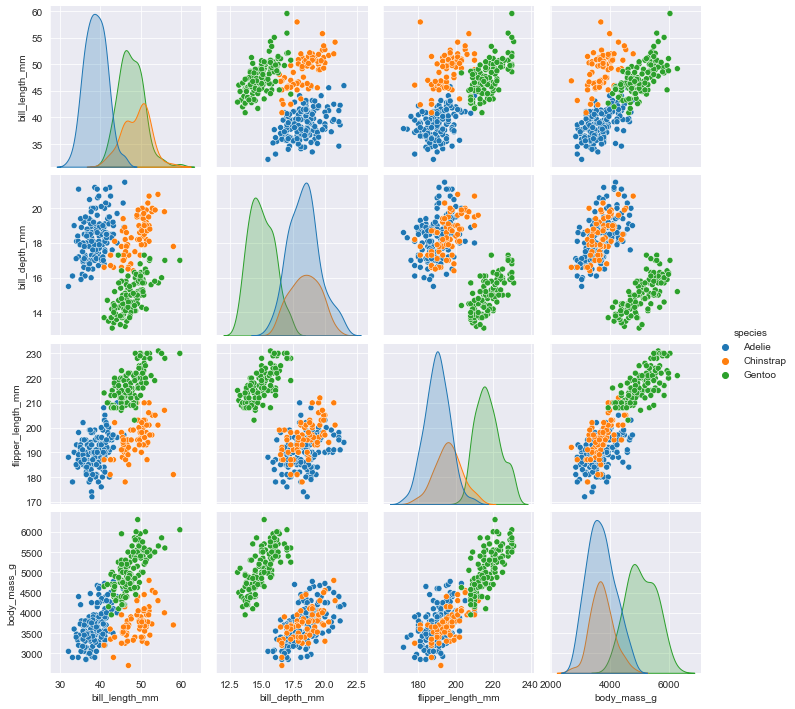

In [27]:
sns.pairplot(penguins,hue="species")

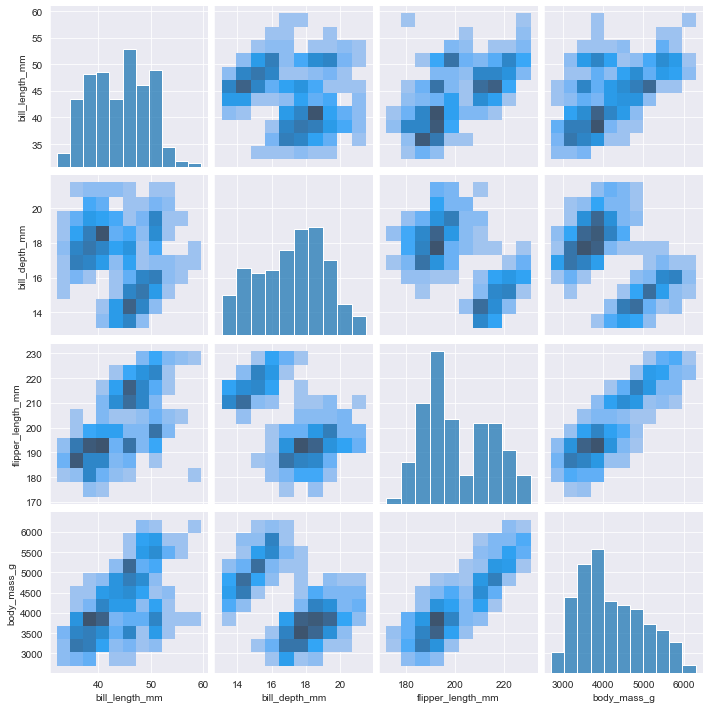

In [28]:
sns.pairplot(penguins,kind="hist")

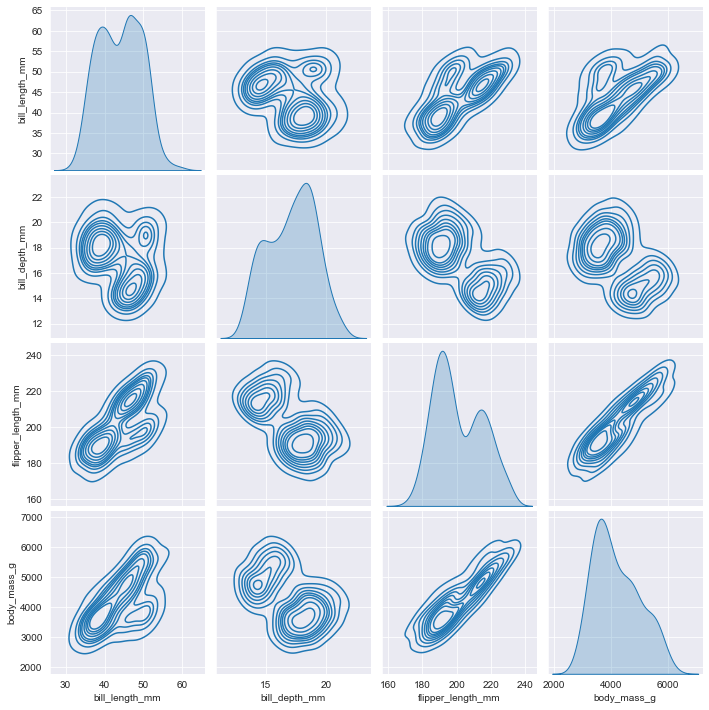

In [29]:
sns.pairplot(penguins,kind="kde")

In [30]:
model=smf.ols("Profit~RDS+ADMS+MKTS",data=start1).fit()

In [31]:
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [32]:
model.tvalues , np.round(model.pvalues,3)

(Intercept     7.626218
 RDS          17.846374
 ADMS         -0.525507
 MKTS          1.655077
 dtype: float64,
 Intercept    0.000
 RDS          0.000
 ADMS         0.602
 MKTS         0.105
 dtype: float64)

In [33]:
model.rsquared , model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [34]:
slr_a=smf.ols("Profit~ADMS",data=start1).fit()
slr_a.tvalues , slr_a.pvalues 

(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

In [35]:
slr_m=smf.ols("Profit~MKTS",data=start1).fit()
slr_m.tvalues , slr_m.pvalues 

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [36]:
mlr_am=smf.ols("Profit~ADMS+MKTS",data=start1).fit()
mlr_am.tvalues , mlr_am.pvalues 

(Intercept    1.142741
 ADMS         2.467779
 MKTS         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMS         1.729198e-02
 MKTS         9.727245e-11
 dtype: float64)

In [37]:
rsq_r=smf.ols("RDS~ADMS+MKTS",data=start1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=start1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=start1).fit().rsquared
vif_m=1/(1-rsq_m)

d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


C:\Users\BHAVYA T.N\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


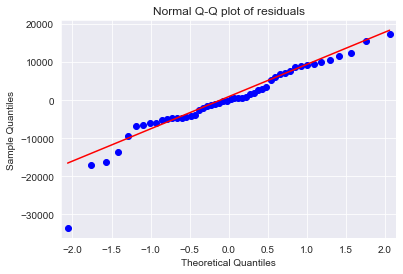

In [38]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [39]:
list(np.where(model.resid<-10000))

[array([14, 15, 48, 49], dtype=int64)]

In [40]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()

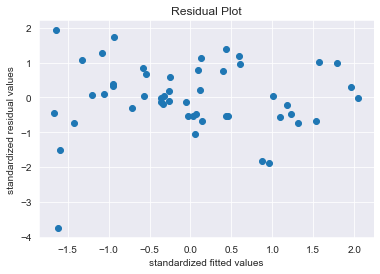

In [41]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

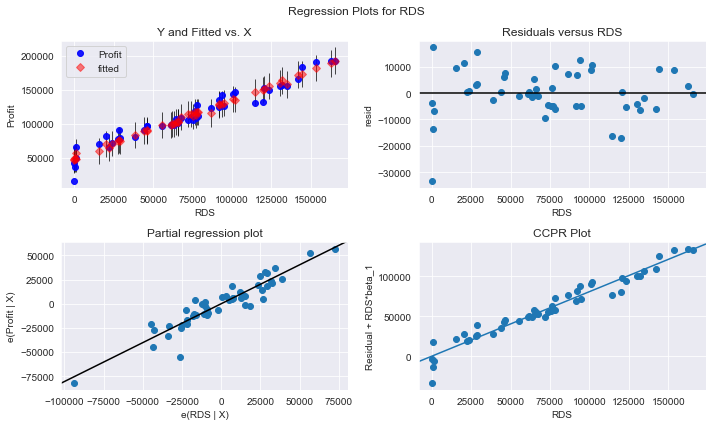

In [42]:
fig=plt.figure(figsize=(10,6))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

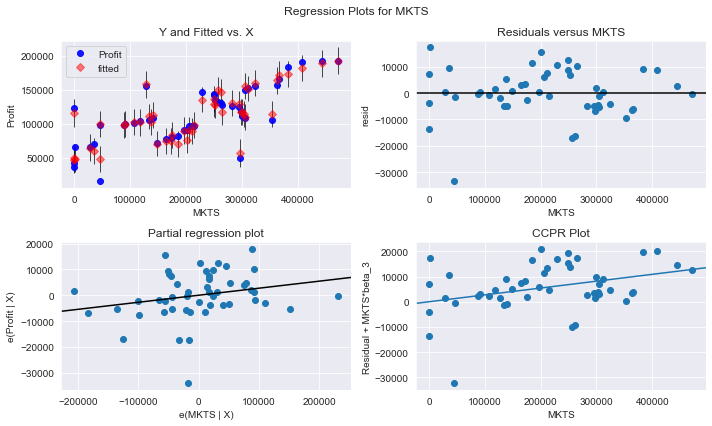

In [43]:
fig=plt.figure(figsize=(10,6))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

In [44]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

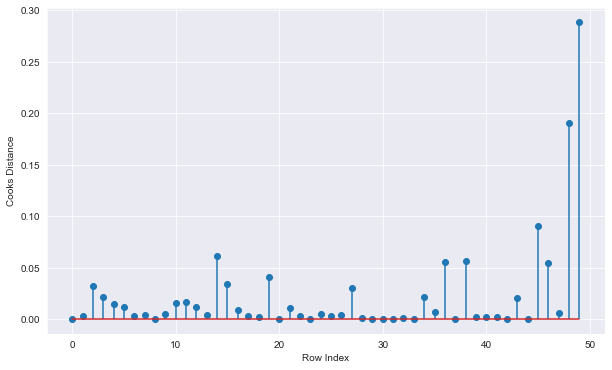

In [46]:
fig=plt.figure(figsize=(10,6))
plt.stem(np.arange(len(start1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [47]:
np.argmax(c) , np.max(c)

(49, 0.28808229275432634)

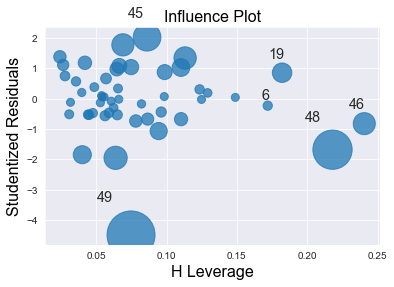

In [48]:
influence_plot(model)
plt.show()

In [51]:
k=start1.shape[1]
n=start1.shape[0]
leverage_cutoff = (6*(k+1))/n
leverage_cutoff

0.72

In [56]:
start1[start1.index.isin([20])] 

,RDS,ADMS,MKTS,State,Profit
20,76253.86,113867.3,298664.47,California,118474.03


In [57]:
start2=start1.drop(start1.index[[20]],axis=0).reset_index(drop=True)
start2

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [58]:
model2=smf.ols("Profit~RDS+ADMS+MKTS",data=start2).fit()

In [60]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~RDS+ADMS+MKTS",data=start2).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        start2=start2.drop(start2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        start2
    else:
        final_model=smf.ols("Profit~RDS+ADMS+MKTS",data=start2).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613331503511137
Thus model accuracy is improved to 0.9627011945234332
Thus model accuracy is improved to 0.9614166226212231
Thus model accuracy is improved to 0.9626008851539795
Thus model accuracy is improved to 0.9654546286296923
Thus model accuracy is improved to 0.9699491439606811
Thus model accuracy is improved to 0.9708843897500387
Thus model accuracy is improved to 0.9724711525253215
Thus model accuracy is improved to 0.9734317059002586
Thus model accuracy is improved to 0.9785816300027127
Thus model accuracy is improved to 0.9797339573333909
Thus model accuracy is improved to 0.9790507530652786
Thus model accuracy is improved to 0.9789993516129429
Thus model accuracy is improved to 0.9807869349010361
Thus model accuracy is improved to 0.9838285273077896
Thus model accuracy is improved to 0.9831174320004664
Thus model accuracy is improved to 0.9833832597687774
Thus model accuracy is improved to 0.9879111300974216
Thus model accuracy is impro

In [61]:
final_model.rsquared

0.9883088972180564

In [62]:
start2

,RDS,ADMS,MKTS,State,Profit
0,142107.34,91391.77,366168.42,Florida,166187.94
1,131876.90,99814.71,362861.36,New York,156991.12
2,130298.13,145530.06,323876.68,Florida,155752.60
3,120542.52,148718.95,311613.29,New York,152211.77
4,123334.88,108679.17,304981.62,California,149759.96
5,91992.39,135495.07,252664.93,California,134307.35
6,94657.16,145077.58,282574.31,New York,125370.37
7,91749.16,114175.79,294919.57,Florida,124266.90
8,67532.53,105751.03,304768.73,Florida,108733.99
9,77044.01,99281.34,140574.81,New York,108552.04


In [64]:
new_data=pd.DataFrame({'RDS':10000,"ADMS":40000,"MKTS":120000},index=[0])
new_data

,RDS,ADMS,MKTS
0,10000,40000,120000


In [65]:
final_model.predict(new_data)

0    60993.490894
dtype: float64

In [67]:
pred_y=final_model.predict(start2)
pred_y

0     165537.495157
1     158472.421846
2     156709.371220
3     149433.678965
4     150083.725118
5     126523.714140
6     129990.649710
7     127771.288062
8     111160.120045
9     110069.734606
10    102327.259545
11    109683.320834
12    103445.280721
13    101897.304440
14     97724.492624
15     97908.288608
16     96972.603148
17     98568.904342
18     93429.696247
19     91106.379144
20     88529.172231
21     84462.421300
22     78414.921605
23     76597.061509
24     73163.436163
25     68088.878670
dtype: float64

In [68]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988309
